# Lime and SHAP For Tabular Data

#### References
* https://whimsical.com/12th-march-christoph-molnar-Uf4rpjDJqAiEv8FePJHg6j
* https://www.youtube.com/watch?v=jhopjN08lTM
* https://blog.dominodatalab.com/shap-lime-python-libraries-part-1-great-explainers-pros-cons
* https://www.kaggle.com/piyushagni5/white-wine-quality/code
* https://towardsdatascience.com/lime-vs-shap-which-is-better-for-explaining-machine-learning-models-d68d8290bb16
* https://github.com/slundberg/shap/blob/master/notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.ipynb

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay
import lime 
from lime import lime_tabular
import shap

In [2]:
wine = pd.read_csv('../data/winequality-red.csv')
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
X = wine.drop('quality', axis=1)
y = wine['quality']
print(f'Unique classes:{wine["quality"].unique()}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Unique classes:[5 6 7 4 8 3]


In [4]:
model = XGBClassifier()
model.fit(X_train, y_train);

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[23:40:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [5]:
test_1 = X_test.iloc[1]

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['3', '4', '5', '6', '7', '8'],
    mode='classification'
)


lime_exp = lime_explainer.explain_instance(
    data_row=test_1,
    predict_fn=model.predict_proba
)
lime_exp.show_in_notebook(show_table=True)

In [10]:
shap.initjs()

shap_explainer = shap.Explainer(model)
shap_values = shap_explainer(X)
# visualize the first prediction's explanation
shap.waterfall_plot(shap_values, X)

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

TypeError: only integer scalar arrays can be converted to a scalar index

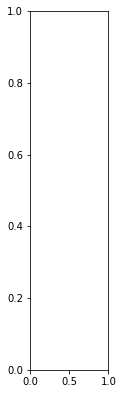

In [11]:
shap.summary_plot(shap_values, X)

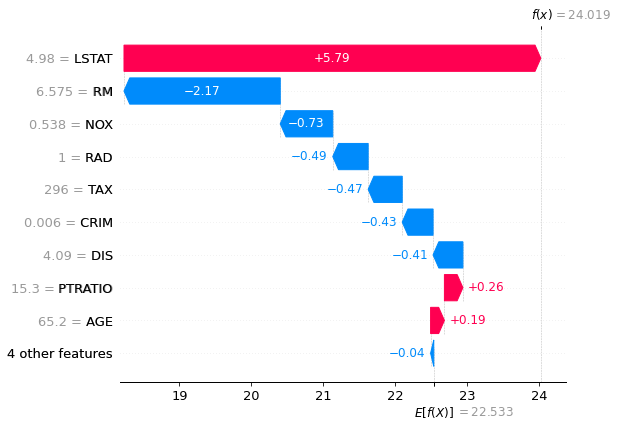

In [12]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])